In [2]:
from src.utils.mp3_to_x import convert_folder_to_wav

In [2]:
convert_folder_to_wav(folder_path="data/MTAT", new_folder='data/MTAT_wav', delete=False)

{'audio_1': tensor([[  1.8605,   4.0115,   2.8632,  ..., -45.4579, -45.4579, -45.4579],
         [ 14.8407,  13.4965,   6.8117,  ..., -45.4579, -45.4579, -45.4579],
         [ 18.6818,  16.4349,  10.6165,  ..., -45.4579, -45.4579, -45.4579],
         ...,
         [-40.8419, -45.1632, -45.4579,  ..., -45.4579, -45.4579, -45.4579],
         [-41.2018, -45.4579, -45.4579,  ..., -45.4579, -45.4579, -45.4579],
         [-41.5137, -45.4579, -45.4579,  ..., -45.4579, -45.4579, -45.4579]]),
 'audio_2': tensor([[  1.8101,   4.0273,   2.8886,  ..., -44.7375, -44.7375, -44.7375],
         [ 14.8174,  13.4287,   6.7370,  ..., -44.7375, -44.7375, -44.7375],
         [ 18.6462,  16.3736,  10.5839,  ..., -44.7375, -44.7375, -44.7375],
         ...,
         [-40.8845, -44.7375, -44.7375,  ..., -44.7375, -44.7375, -44.7375],
         [-41.2448, -44.7375, -44.7375,  ..., -44.7375, -44.7375, -44.7375],
         [-41.5568, -44.7375, -44.7375,  ..., -44.7375, -44.7375, -44.7375]]),
 'rp_1': 0.91070899224

In [3]:
dataset.annotations.file_path[0]

'f/american_bach_soloists-j_s__bach_solo_cantatas-01-bwv54__i_aria-30-59.wav'

In [4]:
from src.training.train import Trainer

trainer = Trainer()

In [5]:
for k in dataset:
    print(k)

{'audio_1': tensor([[  2.0735,   5.5040,   5.9094,  ..., -44.4440, -44.4440, -44.4440],
        [ 12.9330,   9.9068,  11.3510,  ..., -44.4440, -44.4440, -44.4440],
        [ 14.8331,  15.0729,  13.9138,  ..., -44.4440, -44.4440, -44.4440],
        ...,
        [-32.9350, -37.2562, -44.4440,  ..., -44.4440, -44.4440, -44.4440],
        [-33.2511, -37.5722, -44.4440,  ..., -44.4440, -44.4440, -44.4440],
        [-33.5247, -37.8459, -44.4440,  ..., -44.4440, -44.4440, -44.4440]]), 'audio_2': tensor([[  2.0238,   5.3201,   5.6163,  ..., -42.6248, -42.6248, -42.6248],
        [ 12.9186,   9.8613,  11.1091,  ..., -42.6248, -42.6248, -42.6248],
        [ 14.7908,  14.9730,  13.7414,  ..., -42.6248, -42.6248, -42.6248],
        ...,
        [-33.0058, -37.3270, -42.6248,  ..., -42.6248, -42.6248, -42.6248],
        [-33.3214, -37.6426, -42.6248,  ..., -42.6248, -42.6248, -42.6248],
        [-33.5947, -37.9160, -42.6248,  ..., -42.6248, -42.6248, -42.6248]]), 'rp_1': 1.0149438474403079, 'rp_2':

KeyboardInterrupt: 

In [2]:
from src.data_loading.datasets import MTATDataset

dataset = MTATDataset(global_config=gb)

In [3]:
dataset

In [3]:
from IPython.display import Audio
import librosa.display

audio_1,audio_2 = dataset[2]["audio_1"], dataset[2]["audio_2"]


In [4]:
""" import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,figsize=(14, 5))
librosa.display.waveshow(audio_1.numpy(), sr=44100, ax = ax[0])
librosa.display.waveshow(audio_2.numpy(), sr=44100, ax = ax[1]) """

' import matplotlib.pyplot as plt\nfig,ax = plt.subplots(2,1,figsize=(14, 5))\nlibrosa.display.waveshow(audio_1.numpy(), sr=44100, ax = ax[0])\nlibrosa.display.waveshow(audio_2.numpy(), sr=44100, ax = ax[1]) '

In [5]:
audio_1.shape

torch.Size([1, 81, 1361])

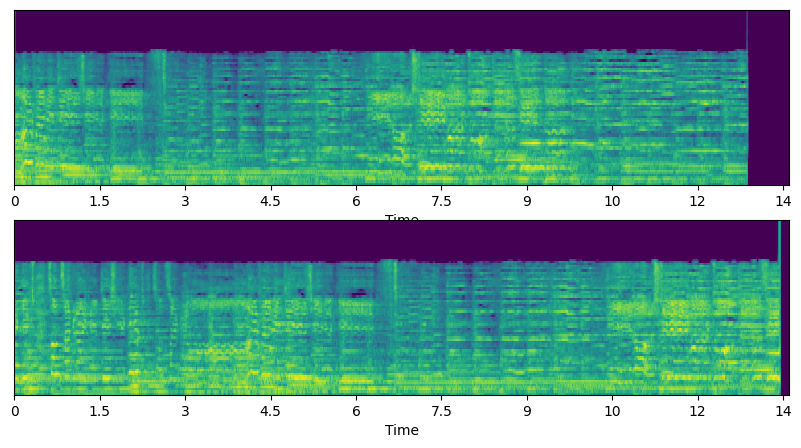

In [6]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,figsize = (10,5))
librosa.display.specshow(audio_1.squeeze().numpy(),sr=44100,hop_length=441,n_fft=2048,win_length=2048, cmap = "viridis", ax = ax[0], x_axis= 'time')
librosa.display.specshow(audio_2.squeeze().numpy(),sr=44100,hop_length=441,n_fft=2048,win_length=2048, cmap = "viridis", ax = ax[1], x_axis= 'time')

In [1]:
from config.full import GlobalConfig
fullconfig = GlobalConfig()

In [2]:
fullconfig.make_global_config()

{'MTAT_config': {'annotations_path': 'data/MTAT_annotations.csv',
  'dir_path': 'data/MTAT',
  'batch_size': 16},
 'preprocessing_config': {'sr': 44100,
  'dataset_sr': 16000,
  'len_audio_s': 13.6,
  'len_audio_n': 599760,
  'len_audio_n_dataset': 217600,
  'rp': 0.1,
  'rp_range': [0.9, 1.1]},
 'train_config': {'mixed_precision': True,
  'filters': 16,
  'dilations': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
  'dropout_rate': 0.1,
  'output_dim': 300,
  'checkpoint_path': 'checkpoints',
  'lr': 0.0001,
  'epochs': 1000,
  'device': 'cuda',
  'display_progress_every': 5,
  'warmup': False,
  'exp_name': 'filters_16_do_0.1_od_300',
  'save_path': 'checkpoints/filters_16_do_0.1_od_300'}}